In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

Using TensorFlow backend.


In [3]:
data = pd.read_csv('creditcard.csv')
data = data.drop(['Time', 'Amount'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
V1       284807 non-null float64
V2       284807 non-null float64
V3       284807 non-null float64
V4       284807 non-null float64
V5       284807 non-null float64
V6       284807 non-null float64
V7       284807 non-null float64
V8       284807 non-null float64
V9       284807 non-null float64
V10      284807 non-null float64
V11      284807 non-null float64
V12      284807 non-null float64
V13      284807 non-null float64
V14      284807 non-null float64
V15      284807 non-null float64
V16      284807 non-null float64
V17      284807 non-null float64
V18      284807 non-null float64
V19      284807 non-null float64
V20      284807 non-null float64
V21      284807 non-null float64
V22      284807 non-null float64
V23      284807 non-null float64
V24      284807 non-null float64
V25      284807 non-null float64
V26      284807 non-null float64
V27      284807 non-null float6

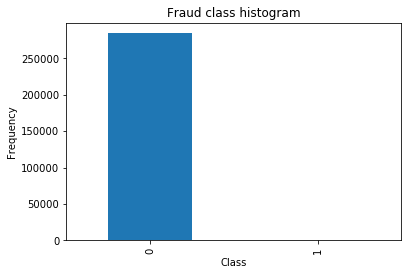

In [4]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')


In [6]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']

In [7]:
X_undersample = np.array(X)
y_undersmaple = np.array(y)

# train, test split
X_train = X_undersample[:250000,:]
y_train = y_undersmaple[:250000,:]
X_test = X_undersample[250000:,:]
y_test = y_undersmaple[250000:,:]

In [8]:
model = Sequential()
model.add(Dense (64, input_dim=28, activation='relu'))
model.add(Dense (64, activation='relu'))
model.add(Dense (1, activation='sigmoid'))

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/3
250000/250000 [==============================] - 3s - loss: 0.0024 - acc: 0.9994     
Epoch 2/3
250000/250000 [==============================] - 3s - loss: 0.0023 - acc: 0.9995     
Epoch 3/3
250000/250000 [==============================] - 3s - loss: 0.0021 - acc: 0.9995     


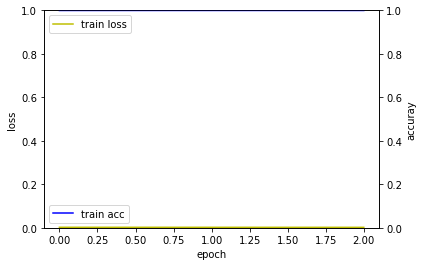

In [11]:
hist = model.fit(X_train, y_train, epochs=3, batch_size=128)

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['acc'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [15]:
# 모델 평가하기
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print(' loss_and_metrics : ' + str(loss_and_metrics))


32768/34807 [===========================>..] - ETA: 0s loss_and_metrics : [0.002773477463781739, 0.9995690522021432]
